# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [23]:
# Dependencies and Setup
#pip install citipy
import os
import csv
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import random
import seaborn as sns
import requests
import urllib
import time
import json
from pprint import pprint
from datetime import datetime
import scipy.stats as st
from scipy.stats import linregress
#pip install <citipy>

# Import API key
from API_keys import Weathermap_API_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [24]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = [] 

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
city_count = len(cities)
print(city_count)

601


In [25]:
cities_df=pd.DataFrame(cities)
cities_df.columns=["City"]
cities_df['Cloudiness'] = ""
cities_df['Country'] = ""
cities_df['Date'] = ""
cities_df['Humidity'] = ""
cities_df['Lat']=""
cities_df['Lng']=""
cities_df['Max Temp']=""
cities_df['Wind Speed']=""
cities_df.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,barrow,,,,,,,,
1,hermanus,,,,,,,,
2,puerto baquerizo moreno,,,,,,,,
3,la esperanza,,,,,,,,
4,jamestown,,,,,,,,


## Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [ ]:
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"
# Build partial query URL
query_url = f"{url}appid={Weathermap_API_key}&units={units}&q="
print(query_url+"London")
#response = requests.get(query_url+"London").json()
#print(response)
new_cities = []
cloudiness = []
country = []
date = []
humidity = []
temp = []
lat = []
lng = []
wind = []
city_data = []
print("Beginning Data Retrieval ")
record_counter = 0
set_counter = 1
for city in cities:
    response = requests.get(query_url + city).json()
    if record_counter < 50:
        record_counter += 1
    else:
        set_counter +=1
        record_counter = 0
    print('Processing record {} of set {} | {}'.format(record_counter, set_counter, city))
    print(url)
    try:
        new_cities.append(response['name'])
        cloudiness.append(response['clouds'] ['all'])
        country.append(response['sys'] ['country'])
        date.append(response['date'])
        humidity.append(response['main'] ['humidity'])
        lat.append(response['coord'] ['lat'])
        lng.append(response['coord'] ['lon'])
        temp.append(response['main'] ['temp_max'])
        wind.append(response['wind'] ['speed'])
        time.sleep(.2)
    except:
        print(f'City not found. Skipping...')
        pass 
print(f'----------------------------------------------')
print(f'Data Retrieval Complete')
print(f'----------------------------------------------')


http://api.openweathermap.org/data/2.5/weather?appid=f563cc6b4ded9445677bab30a69c5435&units=metric&q=London
Beginning Data Retrieval 
Processing record 1 of set 1 | barrow
http://api.openweathermap.org/data/2.5/weather?
City not found. Skipping...
Processing record 2 of set 1 | hermanus
http://api.openweathermap.org/data/2.5/weather?
City not found. Skipping...
Processing record 3 of set 1 | puerto baquerizo moreno
http://api.openweathermap.org/data/2.5/weather?
City not found. Skipping...
Processing record 4 of set 1 | la esperanza
http://api.openweathermap.org/data/2.5/weather?
City not found. Skipping...
Processing record 5 of set 1 | jamestown
http://api.openweathermap.org/data/2.5/weather?
City not found. Skipping...
Processing record 6 of set 1 | mataura
http://api.openweathermap.org/data/2.5/weather?
City not found. Skipping...
Processing record 7 of set 1 | nouadhibou
http://api.openweathermap.org/data/2.5/weather?
City not found. Skipping...
Processing record 8 of set 1 | bulu

Processing record 20 of set 2 | georgetown
http://api.openweathermap.org/data/2.5/weather?
City not found. Skipping...
Processing record 21 of set 2 | cabo san lucas
http://api.openweathermap.org/data/2.5/weather?
City not found. Skipping...
Processing record 22 of set 2 | alingsas
http://api.openweathermap.org/data/2.5/weather?
City not found. Skipping...
Processing record 23 of set 2 | bowen
http://api.openweathermap.org/data/2.5/weather?
City not found. Skipping...
Processing record 24 of set 2 | aden
http://api.openweathermap.org/data/2.5/weather?
City not found. Skipping...
Processing record 25 of set 2 | busselton
http://api.openweathermap.org/data/2.5/weather?
City not found. Skipping...
Processing record 26 of set 2 | saint george
http://api.openweathermap.org/data/2.5/weather?
City not found. Skipping...
Processing record 27 of set 2 | nizhneyansk
http://api.openweathermap.org/data/2.5/weather?
City not found. Skipping...
Processing record 28 of set 2 | tasiilaq
http://api.ope

## Convert Raw Data to DataFrame
* Save as csv

In [19]:
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"
# Build partial query URL
query_url = f"{url}appid={Weathermap_API_key}&units={units}&q="
print(query_url+"London")
data=[]
i=0
for city in cities[:50]:
#    print(city)
    json = requests.get(query_url + city).json()
    i=i+1
    try:
        tempmax=json["main"]['temp_max']
        humidity=json["main"]["humidity"]
        speed=json['wind']["speed"]
        cloudiness=json["clouds"]["all"]
        lat=json["coord"]["lat"]
        country=json['sys']["country"]
        date=json['dt']
        lon=json["coord"]["lon"]
        data.append([city,cloudiness,country,date,humidity,lat,lon,tempmax,speed])
#        data.append([city,temp,temp1,temp2,temp3,temp6,temp4,temp5,temp7])
        print(f"counter {i} || {city}")
        time.sleep(.1)
    except:
        print("city not found")

http://api.openweathermap.org/data/2.5/weather?appid=f563cc6b4ded9445677bab30a69c5435&units=metric&q=London
city not found
city not found
city not found
city not found
city not found
city not found
city not found
city not found
city not found
city not found
city not found
city not found
city not found
city not found
city not found
city not found
city not found
city not found
city not found
city not found
city not found
city not found
city not found
city not found
city not found
city not found
city not found
city not found
city not found
city not found
city not found
city not found
city not found
city not found
city not found
city not found
city not found
city not found
city not found
city not found
city not found
city not found
city not found
city not found
city not found
city not found
city not found
city not found
city not found
city not found


In [20]:
data_df=pd.DataFrame(data,columns=["City","Cloudiness","Country", "Date","Humidity","Lat","Lng","Max Temp","Wind Speed"])
data_df.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

### Latitude vs. Temperature Plot

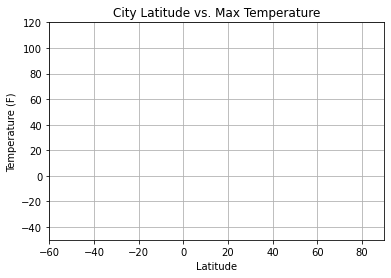

In [21]:

weather_df = pd.DataFrame(data_df)
plt.scatter(weather_df["Lat"], weather_df["Max Temp"], marker = "o", s=10)
plt.title(f"City Latitude vs. Max Temperature")
plt.ylabel("Temperature (F)")
plt.ylim(-50,120)
plt.xlabel("Latitude")
plt.xlim(-60,90)
plt.grid(True)
plt.savefig("Temperature.png")
plt.show()



### Latitude vs. Humidity Plot

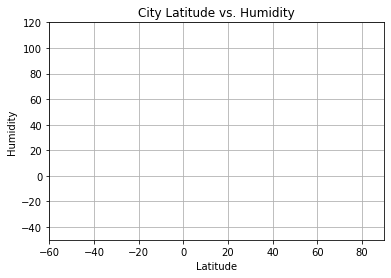

In [22]:
weather_df = pd.DataFrame(data_df)
plt.scatter(weather_df["Lat"], weather_df["Humidity"], marker = "o", s=10)
plt.title(f"City Latitude vs. Humidity")
plt.ylabel("Humidity")
plt.ylim(-50,120)
plt.xlabel("Latitude")
plt.xlim(-60,90)
plt.grid(True)
plt.savefig("Humidity.png")
plt.show()

### Latitude vs. Cloudiness Plot

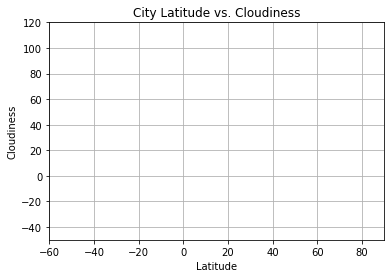

In [171]:
weather_df = pd.DataFrame(data_df)
plt.scatter(weather_df["Lat"], weather_df["Cloudiness"], marker = "o", s=10)
plt.title(f"City Latitude vs. Cloudiness")
plt.ylabel("Cloudiness")
plt.ylim(-50,120)
plt.xlabel("Latitude")
plt.xlim(-60,90)
plt.grid(True)
plt.savefig("Cloudiness.png")
plt.show()

### Latitude vs. Wind Speed Plot

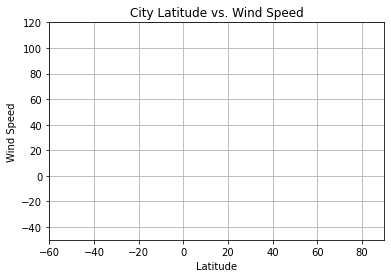

In [172]:
weather_df = pd.DataFrame(data_df)
plt.scatter(weather_df["Lat"], weather_df["Wind Speed"], marker = "o", s=10)
plt.title(f"City Latitude vs. Wind Speed")
plt.ylabel("Wind Speed")
plt.ylim(-50,120)
plt.xlabel("Latitude")
plt.xlim(-60,90)
plt.grid(True)
plt.savefig("WindSpeed.png")
plt.show()

## Linear Regression

### Write linear regression plot function (optional)

In [173]:
def LinearRegressionplot(x_values, y_values):
    (slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values,y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y =" + str(round(slope,2)) + "x +" + str(round(intercept,2))
    plt.scatter(x_values, y_values)
    plt.plot(x_values,regress_values,"r-" )
    plt.xlabel('Latitude')
    plt.ylabel(str(y_values.name))
    plt.annotate(line_eq,(0,0), fontsize=15,color="red")
    print(f"The r-squared is: {rvalue}")
plt.show()

###  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

In [174]:
Northern_Hemisphere = weather_df.loc[weather_df['Lat']>0]
Southern_Hemisphere = weather_df.loc[weather_df['Lat']<0]
x_values = Northern_Hemisphere["Lat"]
y_values = Northern_Hemisphere["Max Temp"]
LinearRegressionplot(x_values, y_values)

ValueError: Inputs must not be empty.

###  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

In [175]:
Northern_Hemisphere = weather_df.loc[weather_df['Lat']>0]
Southern_Hemisphere = weather_df.loc[weather_df['Lat']<0]
x_values = Southern_Hemisphere["Lat"]
y_values = Southern_Hemisphere["Max Temp"]
LinearRegressionplot(x_values, y_values)

ValueError: Inputs must not be empty.

###  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

In [176]:
Northern_Hemisphere = weather_df.loc[weather_df['Lat']>0]
Southern_Hemisphere = weather_df.loc[weather_df['Lat']<0]
x_values = Northern_Hemisphere["Lat"]
y_values = Northern_Hemisphere["Humidity"]
LinearRegressionplot(x_values, y_values)

ValueError: Inputs must not be empty.

###  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

In [177]:
Northern_Hemisphere = weather_df.loc[weather_df['Lat']>0]
Southern_Hemisphere = weather_df.loc[weather_df['Lat']<0]
x_values = Southern_Hemisphere["Lat"]
y_values = Southern_Hemisphere["Humidity"]
LinearRegressionplot(x_values, y_values)

ValueError: Inputs must not be empty.

###  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

In [178]:
Northern_Hemisphere = weather_df.loc[weather_df['Lat']>0]
Southern_Hemisphere = weather_df.loc[weather_df['Lat']<0]
x_values = Northern_Hemisphere["Lat"]
y_values = Northern_Hemisphere["Cloudiness"]
LinearRegressionplot(x_values, y_values)

ValueError: Inputs must not be empty.

###  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

In [179]:
Northern_Hemisphere = weather_df.loc[weather_df['Lat']>0]
Southern_Hemisphere = weather_df.loc[weather_df['Lat']<0]
x_values = Southern_Hemisphere["Lat"]
y_values = Southern_Hemisphere["Cloudiness"]
LinearRegressionplot(x_values, y_values)

ValueError: Inputs must not be empty.

###  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

In [180]:
Northern_Hemisphere = weather_df.loc[weather_df['Lat']>0]
Southern_Hemisphere = weather_df.loc[weather_df['Lat']<0]
x_values = Northern_Hemisphere["Lat"]
y_values = Northern_Hemisphere["Wind Speed"]
LinearRegressionplot(x_values, y_values)

ValueError: Inputs must not be empty.

###  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

In [181]:
Northern_Hemisphere = weather_df.loc[weather_df['Lat']>0]
Southern_Hemisphere = weather_df.loc[weather_df['Lat']<0]
x_values = Southern_Hemisphere["Lat"]
y_values = Southern_Hemisphere["Wind Speed"]
LinearRegressionplot(x_values, y_values)

ValueError: Inputs must not be empty.